## Assignment 1
Submitted by Akriti Chadda

Importing Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset
(Please note the path to the dataset. I could not upload the data set to github, so you will have to change the path to the dataset locally for the notebook to work)

In [2]:
data = pd.read_csv('~/Downloads/movie_lens_genre_separated.tsv', sep='\t')

Visualising what the raw dataset looks like by looking at the top 5 rows

In [3]:
data.head(5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


Converting age to age groups and Occupation to Strings

In [4]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

# Part 1: 
#### An aggregate of the movie ratings for each particular genre
This can be done by using either numpy or a pivot table. Showcasing both the methods below.

In [5]:
data.groupby('genres').agg({'rating': [np.mean]})

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332


In [6]:
mean_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')

In [7]:
mean_ratings


,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


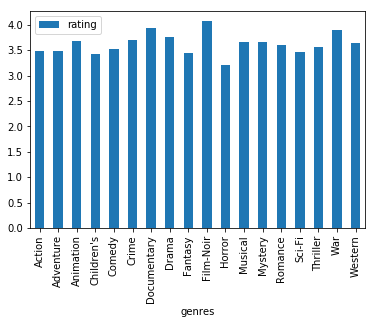

In [38]:
mean_ratings.plot(kind='bar')


I understood that horror movies received the lowest ratings and surprisingly, Film-Noir the highest.

# Part 2
#### The top 5 highest ranked genre by occupation

In [39]:
genres_occupation = data.pivot_table('rating', index='genres', columns='occupation', aggfunc='mean')
genres_occupation

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.652772,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.854545,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914
Drama,3.782167,3.754293,3.732216,3.790601,3.748794,3.739991,3.871756,3.766663,3.627545,3.791185,...,3.743350,3.840207,3.949047,3.788018,3.836070,3.791983,3.800158,3.738553,3.619308,3.653348
Fantasy,3.298039,3.456388,3.424432,3.472675,3.363636,3.431478,3.486842,3.471070,3.407895,3.606357,...,3.426315,3.497192,3.678019,3.600000,3.545362,3.494278,3.528097,3.420833,3.230900,3.338421


In [46]:
new_top_occupation_genre_df = pd.DataFrame()
for i in range(21):
    new_top_occupation_genre_df[occupation_dict[i]] = genres_occupation[occupation_dict[i]].sort_values(ascending=False)[:5].keys()
new_top_occupation_genre_df.index = np.arange(1, len(new_top_occupation_genre_df) + 1)
new_top_occupation_genre_df.index.name = "Rank"
new_top_occupation_genre_df

,not specified,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
Rank,,,,,,,,,,,,,,,,,,,,,
1,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Documentary,Film-Noir,Documentary,War,...,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir
2,Documentary,Documentary,Documentary,War,Documentary,Documentary,Film-Noir,Documentary,Film-Noir,Musical,...,Documentary,War,War,Documentary,Documentary,Documentary,Documentary,War,Documentary,Documentary
3,War,War,War,Musical,War,Animation,War,War,War,Documentary,...,War,Documentary,Documentary,War,War,War,War,Western,War,War
4,Drama,Drama,Drama,Documentary,Drama,War,Drama,Drama,Western,Animation,...,Drama,Drama,Drama,Drama,Animation,Drama,Drama,Animation,Crime,Animation
5,Animation,Musical,Mystery,Animation,Crime,Drama,Crime,Crime,Drama,Drama,...,Mystery,Western,Mystery,Animation,Drama,Crime,Animation,Drama,Drama,Musical


# Part 3
### The most popular (with most ratings) movie by age group

In [48]:
by_age_group = data.loc[data.index].groupby(['title', 'age'])
by_age_group.rating.size().unstack(1).fillna(0)['18-24'].sort_values(ascending=False)[:1].keys()


age_numbers = [1, 18, 25, 35, 45, 50, 56]
columns = ['age', 'title']
age_group = []
popular_movie_title = []

for age in age_numbers:
    age_group.append(age_dict[age])
    popular_movie_title.append(by_age_group.rating.size().unstack(1).fillna(0)[age_dict[age]].sort_values(ascending=False)[:1].keys()[0])

data_dict = {'age' : age_group, 'title' : popular_movie_title}
new_top_movie_by_age = pd.DataFrame(data_dict, columns=columns)
new_top_movie_by_age


,age,title
0,Under 18,Star Wars: Episode VI - Return of the Jedi (1983)
1,18-24,Star Wars: Episode VI - Return of the Jedi (1983)
2,25-34,Star Wars: Episode V - The Empire Strikes Back...
3,35-44,Star Wars: Episode V - The Empire Strikes Back...
4,45-49,Star Wars: Episode V - The Empire Strikes Back...
5,50-55,Star Wars: Episode V - The Empire Strikes Back...
6,56+,Star Wars: Episode V - The Empire Strikes Back...


# Part 4
### A breakdown of a movie’s ratings by occupation, using any movie of your choice

In [49]:
top_movie_occupation = data.pivot_table('rating', index='title', columns='occupation', aggfunc='mean')
top_movie_occupation.loc['Star Trek: Generations (1994)']

occupation
K-12 student            3.230769
academic/educator       3.250000
artist                  3.352941
clerical/admin          3.653846
college/grad student    3.136691
customer service        3.200000
doctor/health care      3.178571
executive/managerial    3.569892
farmer                  3.333333
homemaker               3.555556
lawyer                  3.400000
not specified           3.365079
programmer              3.416667
retired                 3.666667
sales/marketing         3.425532
scientist               3.233333
self-employed           3.720930
technician/engineer     3.465517
tradesman/craftsman     3.555556
unemployed              3.333333
writer                  3.441860
Name: Star Trek: Generations (1994), dtype: float64

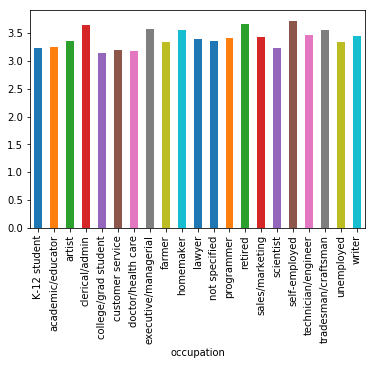

In [50]:
top_movie_occupation.loc['Star Trek: Generations (1994)'].plot('bar')

Rated almost the same by all genres

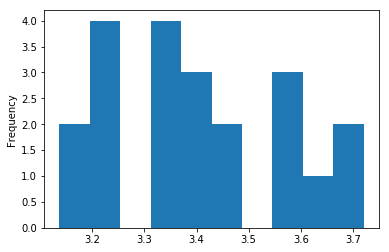

In [51]:
top_movie_occupation.loc['Star Trek: Generations (1994)'].plot('hist')

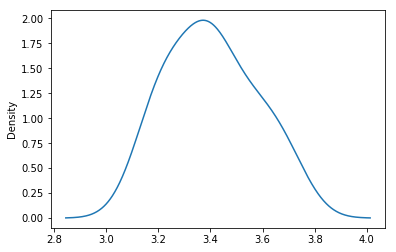

In [52]:
top_movie_occupation.loc['Star Trek: Generations (1994)'].plot('density')

Average Rating ~ 3.4

# Part 5
####  A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [64]:
def user_details(user_id):
    print("User's age : ", data.loc[user_id]['age'])
    print("User's occupation : ", data.loc[user_id]['occupation'])
    user_ratings = data.loc[data['user_id'] == user_id]
    print("Average rating given by the user : ", user_ratings.rating.mean())
    sorted_user_ratings = user_ratings.sort_values(by='rating')
    # print(sorted_user_ratings)
    print("Lowest Rated Movie by the user : ", sorted_user_ratings.head(1)['title'])
    print("Highest Rated Movie by the user : ", sorted_user_ratings.tail(1).title)

#### Running an example:

In [65]:
user_details(2917)

User's age :  25-34
User's occupation :  customer service
Average rating given by the user :  3.423611111111111
Lowest Rated Movie by the user :  887573    Arachnophobia (1990)
Name: title, dtype: object
Highest Rated Movie by the user :  2059139    Paradise Lost: The Child Murders at Robin Hood...
Name: title, dtype: object


# Part 6
####  Some other statistic, figure, aggregate, or plot that you created using this dataset,along with a short description of what interesting observations you derived from it

### Plot 1
#### Average Ratings per user

1. Making a new dataframe grouped by user_id with the average ratings per user

In [66]:
temp_df = data[['user_id','rating']].groupby('user_id').mean()
temp_df.head()

,rating
user_id,
1,4.198276
2,3.670139
3,3.910569
4,3.982759
5,3.127841


2. Plotting the histogram 
3. Plotting the cumulative function over all the ratings to understand the presence of a bias

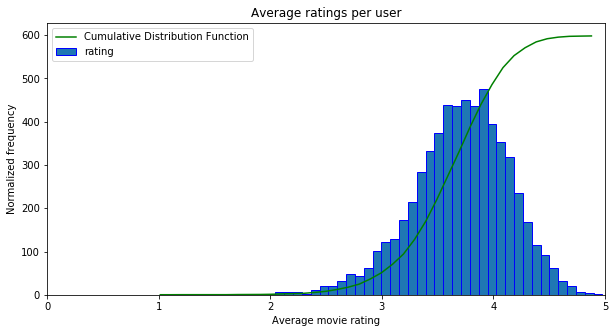

In [67]:
temp_df.plot(kind='hist', bins=50, grid=0, edgecolor='blue', figsize=(10,5))

values, base = np.histogram(temp_df, bins=40)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='green', label='Cumulative Distribution Function')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

### Insight
I can see that the movie 'raters' tend to rate the movie on the upper side of the movie spectrum i.e. between 3 and 5. This makes sense because of many different reasons : 
- People don't want to watch movies that aren't rated or are rated badly
- In turn, more people watch highly rated movies and rate them even more
- People don't want to take out the time to rate movies that they didn't like and so number of low ratings is less




## Plot 2
#### Visualising the difference in ratings between men and women for the top 50 most rated movies

Disclaimer : I used the code provided in the sample notebook to help with this visualisation

In [72]:
MF_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
top_female_ratings = MF_ratings.sort_values(by='F', ascending=False)
top_male_ratings = MF_ratings.sort_values(by='M', ascending=False)
MF_ratings['diff'] = MF_ratings['M'] - MF_ratings['F']

gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,-0.613095
'Night Mother (1986),3.388889,3.352941,-0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547


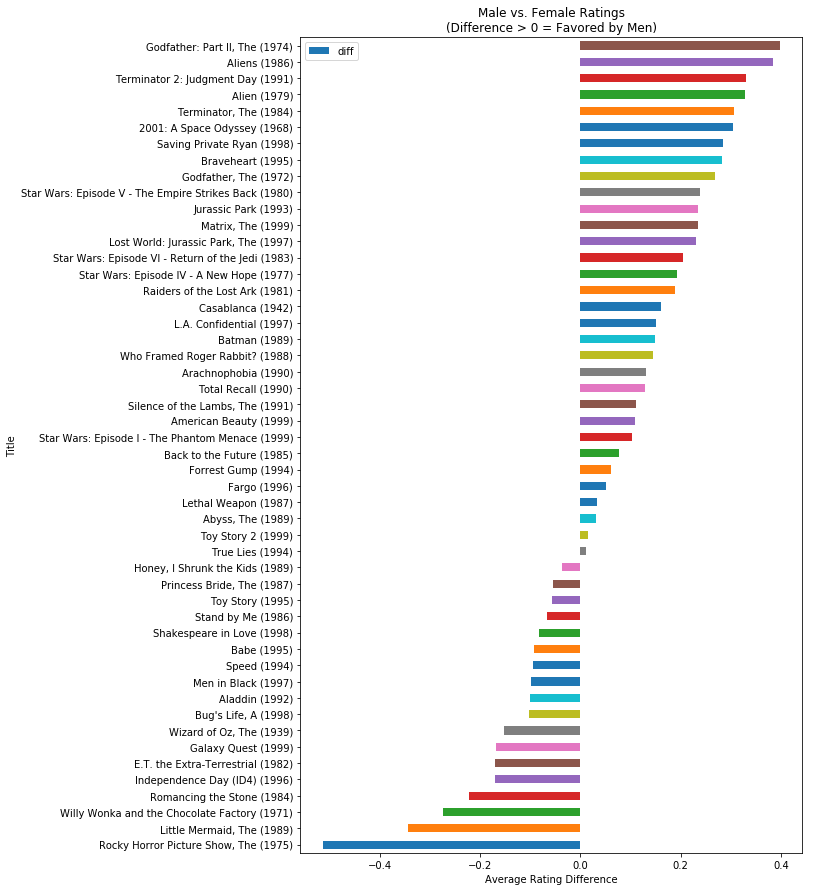

In [69]:
# Finding the top 50 movies
top_50 = data.groupby('title').size().sort_values(ascending=False)[:50]
# generating the differences 
disagreements = MF_ratings[MF_ratings.index.isin(top_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')
plt.legend()

It's just interesting to note how the Females rated The Little Mermaid and The Rocky Horror Picture Show whereas the Men rated Godfather 2 and Aliens highly. No wonder the gender stereotypes are real! Toy Story 2 on the other hand won the cake with both genders.